# week4 授業課題 信用情報

## 【問題1】コンペティション内容の確認

- 何を学習し、何を予測するのか

貸し倒れに関する要素を学習、個人が貸し倒るかどうかを予測

- どのようなファイルを作りKaggleに提出するか
>For each SK_ID_CURR in the test set, you must predict a probability for the TARGET variable. The file should contain a header and have the following format:

SK_ID_CURR,TARGET
100001,0.1
100005,0.9
100013,0.2

- 提出されたものはどういった指標値で評価されるのか
>area under the ROC curve between the predicted probability and the observed target.

## 【問題2】学習と検証

In [2]:
#データを簡単に分析、前処理し、学習、検証するまでの一連の流れを作成・実行
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

df = pd.read_csv('application_train.csv')
print(df.shape)

#ドメイン知識を使う！

(307511, 122)


In [2]:
# .head()、.info()、describe()などを使う
display(df.head(10))
print(df.info())
#print(df.describe())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


In [3]:
#欠損値の有無を見る
import missingno as msno
import matplotlib.pyplot as plt

%matplotlib inline
for i in df.columns:
    print(i, df[i].isnull().sum(), sep = ":")

SK_ID_CURR:0
TARGET:0
NAME_CONTRACT_TYPE:0
CODE_GENDER:0
FLAG_OWN_CAR:0
FLAG_OWN_REALTY:0
CNT_CHILDREN:0
AMT_INCOME_TOTAL:0
AMT_CREDIT:0
AMT_ANNUITY:12
AMT_GOODS_PRICE:278
NAME_TYPE_SUITE:1292
NAME_INCOME_TYPE:0
NAME_EDUCATION_TYPE:0
NAME_FAMILY_STATUS:0
NAME_HOUSING_TYPE:0
REGION_POPULATION_RELATIVE:0
DAYS_BIRTH:0
DAYS_EMPLOYED:0
DAYS_REGISTRATION:0
DAYS_ID_PUBLISH:0
OWN_CAR_AGE:202929
FLAG_MOBIL:0
FLAG_EMP_PHONE:0
FLAG_WORK_PHONE:0
FLAG_CONT_MOBILE:0
FLAG_PHONE:0
FLAG_EMAIL:0
OCCUPATION_TYPE:96391
CNT_FAM_MEMBERS:2
REGION_RATING_CLIENT:0
REGION_RATING_CLIENT_W_CITY:0
WEEKDAY_APPR_PROCESS_START:0
HOUR_APPR_PROCESS_START:0
REG_REGION_NOT_LIVE_REGION:0
REG_REGION_NOT_WORK_REGION:0
LIVE_REGION_NOT_WORK_REGION:0
REG_CITY_NOT_LIVE_CITY:0
REG_CITY_NOT_WORK_CITY:0
LIVE_CITY_NOT_WORK_CITY:0
ORGANIZATION_TYPE:0
EXT_SOURCE_1:173378
EXT_SOURCE_2:660
EXT_SOURCE_3:60965
APARTMENTS_AVG:156061
BASEMENTAREA_AVG:179943
YEARS_BEGINEXPLUATATION_AVG:150007
YEARS_BUILD_AVG:204488
COMMONAREA_AVG:214865
ELE

In [4]:
!pip install category_encoders

In [5]:
#ダミー変数化
import category_encoders as ce

#エンコードしたい列を指定　# Eoncodeしたい列をリストで指定。もちろん複数指定可能。
#全て
list_cols = ['NAME_CONTRACT_TYPE','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALTY','CNT_CHILDREN'
            ,'NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','NAME_TYPE_SUITE','NAME_INCOME_TYPE'
            ,'NAME_EDUCATION_TYPE','OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START','ORGANIZATION_TYPE'
            ,'FONDKAPREMONT_MODE','HOUSETYPE_MODE','WALLSMATERIAL_MODE','EMERGENCYSTATE_MODE']
# OneHotEncodeしたい列を指定。Nullや不明の場合の補完方法も指定。
ce_ohe = ce.OneHotEncoder(cols=list_cols,handle_unknown='impute')
# pd.DataFrameをそのまま突っ込む
df_gender_onehot = ce_ohe.fit_transform(df)

In [6]:
display(df_gender_onehot)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_1,NAME_CONTRACT_TYPE_2,CODE_GENDER_1,CODE_GENDER_2,CODE_GENDER_3,FLAG_OWN_CAR_1,FLAG_OWN_CAR_2,FLAG_OWN_REALTY_1,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,1,0,1,0,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,0,1,1,0,0,0,1,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,1,0,0,1,0,1,0,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,1,0,1,0,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,1,0,1,0,0,1,0,0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,1,0,0,1,0,1,0,1,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,1,0,0,1,0,1,0,1,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,1,0,0,1,0,1,0,1,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


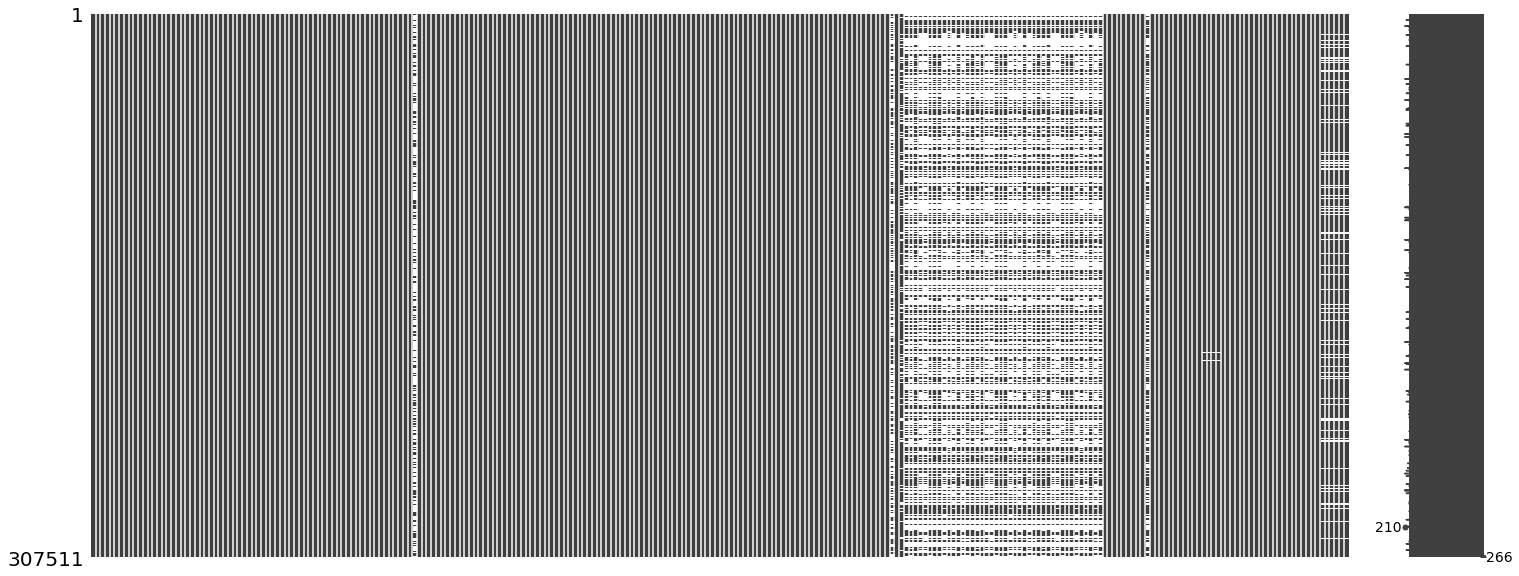

In [7]:
#msno.matrix(df_gender_onehot)

In [6]:
#欠損処理
for i in df_gender_onehot.columns:
    print(i, df_gender_onehot[i].isnull().sum(), sep = ":")
#display(df['OCCUPATION_TYPE'])

SK_ID_CURR:0
TARGET:0
NAME_CONTRACT_TYPE_1:0
NAME_CONTRACT_TYPE_2:0
CODE_GENDER_1:0
CODE_GENDER_2:0
CODE_GENDER_3:0
FLAG_OWN_CAR_1:0
FLAG_OWN_CAR_2:0
FLAG_OWN_REALTY_1:0
FLAG_OWN_REALTY_2:0
CNT_CHILDREN_1:0
CNT_CHILDREN_2:0
CNT_CHILDREN_3:0
CNT_CHILDREN_4:0
CNT_CHILDREN_5:0
CNT_CHILDREN_6:0
CNT_CHILDREN_7:0
CNT_CHILDREN_8:0
CNT_CHILDREN_9:0
CNT_CHILDREN_10:0
CNT_CHILDREN_11:0
CNT_CHILDREN_12:0
CNT_CHILDREN_13:0
CNT_CHILDREN_14:0
CNT_CHILDREN_15:0
AMT_INCOME_TOTAL:0
AMT_CREDIT:0
AMT_ANNUITY:12
AMT_GOODS_PRICE:278
NAME_TYPE_SUITE_1:0
NAME_TYPE_SUITE_2:0
NAME_TYPE_SUITE_3:0
NAME_TYPE_SUITE_4:0
NAME_TYPE_SUITE_5:0
NAME_TYPE_SUITE_6:0
NAME_TYPE_SUITE_7:0
NAME_TYPE_SUITE_8:0
NAME_INCOME_TYPE_1:0
NAME_INCOME_TYPE_2:0
NAME_INCOME_TYPE_3:0
NAME_INCOME_TYPE_4:0
NAME_INCOME_TYPE_5:0
NAME_INCOME_TYPE_6:0
NAME_INCOME_TYPE_7:0
NAME_INCOME_TYPE_8:0
NAME_EDUCATION_TYPE_1:0
NAME_EDUCATION_TYPE_2:0
NAME_EDUCATION_TYPE_3:0
NAME_EDUCATION_TYPE_4:0
NAME_EDUCATION_TYPE_5:0
NAME_FAMILY_STATUS_1:0
NAME_FAMILY

In [7]:
df_sus_EXT = df_gender_onehot.loc[:,'EXT_SOURCE_1':'NONLIVINGAREA_MEDI']

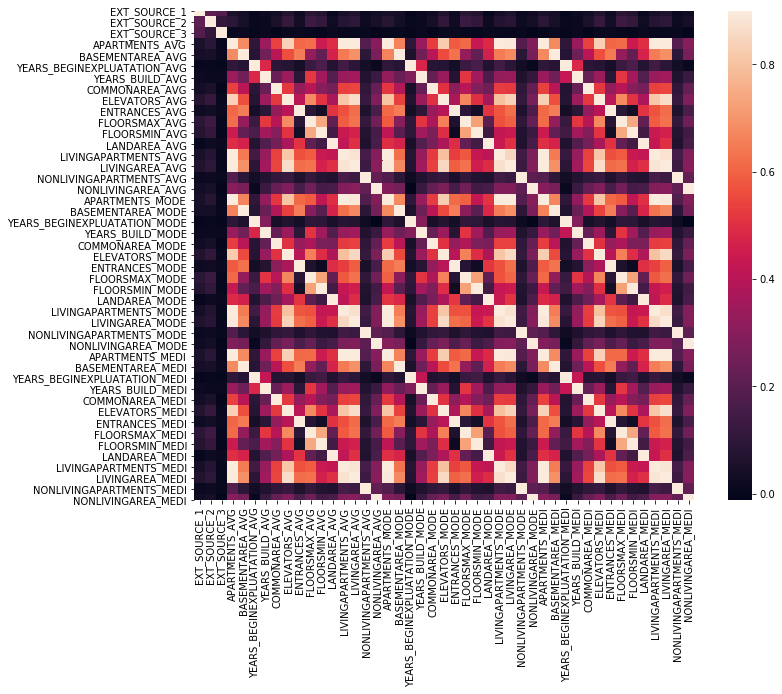

In [8]:
corr_sus_EXT = df_sus_EXT.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_sus_EXT, vmax=0.9, square = True)

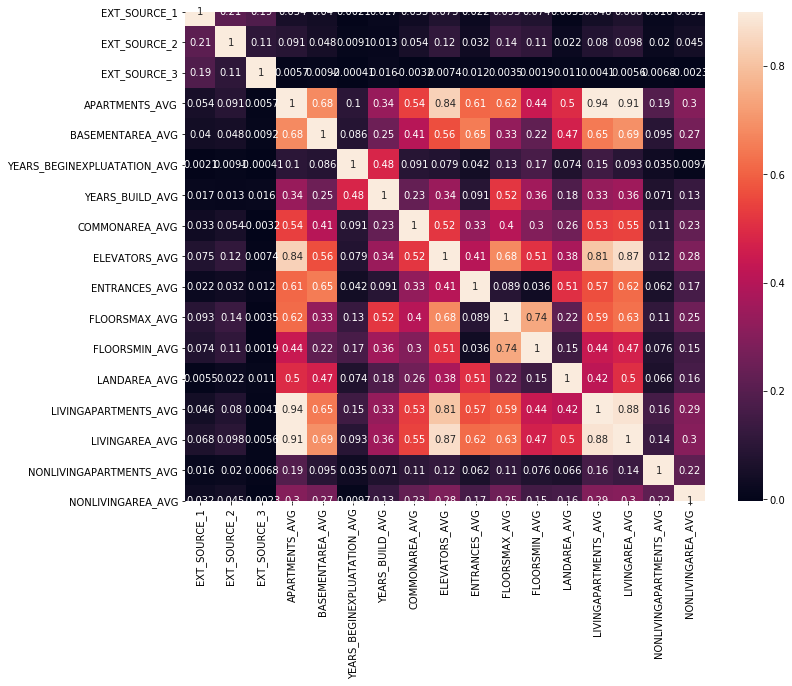

In [9]:
#見にくいので、一区画のみにする
df_sus_EXT2 = df_gender_onehot.loc[:,'EXT_SOURCE_1':'NONLIVINGAREA_AVG']
corr_sus_EXT2 = df_sus_EXT2.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corr_sus_EXT2, vmax=0.9, square = True, annot= True)

In [8]:
#全部０で埋める
df_gender_onehot_0 = df_gender_onehot.fillna(0)
#display(df_gender_onehot_0)

In [9]:
#平均で埋める
#from sklearn.preprocessing import Imputer
#imr = Imputer(missing_values='NaN',strategy='mean', axis = 0)
#df_gender_onehot_mean = imr.fit_transform(df_gender_onehot)
df_gender_onehot_mean = df_gender_onehot.fillna(df_gender_onehot.mean())
#display(df_gender_onehot_mean)

In [12]:
#線形補間で埋める?
#とりあえず最頻値、中央値で埋める
df_gender_onehot_med = df_gender_onehot.fillna(df_gender_onehot.median())
df_gender_onehot_mode = df_gender_onehot.fillna(df_gender_onehot.mode())

In [12]:
#データを結合 -> 処理大きすぎてカーネルが止まるので断念
#df_mix_1 = pd.merge(df_gender_onehot_0, df_gender_onehot_mean,on="TARGET", how = "outer")

#df_gender_onehot_med, df_gender_onehot_mode
#print(df_mix.shape)

In [10]:
#ターゲットを分ける
#pd.set_option('display.max_columns',1000)
#display(df_mix.head(2)['WALLSMATERIAL_MODE_5'])

X = df_gender_onehot_0.drop("TARGET", axis = 1)
y = df_gender_onehot_0.loc[:,'TARGET']

#標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

X_0_train, X_0_test, y_0_train, y_0_test = train_test_split(X_std, y, 
                                                            test_size=0.25, 
                                                            stratify=df_gender_onehot_0["TARGET"])



In [11]:
#ランダムフォレスト 

rf = RandomForestRegressor(n_estimators=100, max_depth = 2, random_state = 0)


In [12]:
rf.fit(X_0_train, y_0_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=2,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [16]:
#print(rf.feature_importances_)
X_0_fi = rf.feature_importances_
y_0_pred = rf.predict(X_0_test)

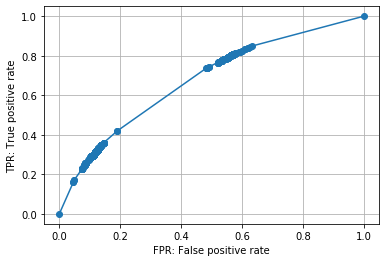

In [18]:
#ROC曲線
from sklearn.metrics import roc_curve
#y_0_score = rf.score(X_0_test, y_0_test,sample_weight=None)

fpr, tpr, thresholds = roc_curve(y_0_test, y_0_pred)

plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

In [ ]:
#ROC AUC

In [114]:
#データ数の差が大きすぎるから？

## 【問題3】テストデータに対する推定
>テストデータ（application_test.csv）に対して推定を行い、Kaggleに提出を行ってください。
正しく提出が行えていれば、精度は低くても構いません。

In [26]:
!pwd

/Users/akishimasaki/diveintocode-ml


In [19]:
train = pd.read_csv("application_train.csv")
test = pd.read_csv("application_test.csv")

categorical_features=[]
for col in train.columns:
    if train[col].dtype=="object":
        categorical_features.append(col)

train = train.fillna(0)
test = test.fillna(0)

In [20]:
X=train.iloc[:,2:]
y=train.iloc[:,1]

test_oh=pd.get_dummies(test.iloc[:,1:], columns=categorical_features)

In [21]:
X_oh=pd.get_dummies(X, columns=categorical_features)

In [22]:
X_train, X_valid, y_train, y_valid=train_test_split(X_oh, y, test_size=0.25, random_state=0)

In [23]:
X_oh.head(5)

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_0,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,-2120,...,0,0,0,0,0,1,0,0,1,0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,-291,...,1,0,0,0,0,0,0,0,1,0
2,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,-2531,...,0,0,0,0,0,0,0,1,0,0
3,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,-2437,...,0,0,0,0,0,0,0,1,0,0
4,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,-3458,...,0,0,0,0,0,0,0,1,0,0


In [25]:
Rf=RandomForestRegressor(n_estimators=100, max_depth = 2, random_state = 0)
Rf.fit(X_train, y_train)
y_pred=Rf.predict(X_valid)

In [27]:
from sklearn.metrics import roc_auc_score
roc=roc_auc_score(y_valid, y_pred)
roc

0.6766871449638108

In [39]:
#trainデータにあって、testデータにない列を追加
def fill_missing_columns(df_a, df_b):
    columns_for_b = set(df_a.columns) - set(df_b.columns)
    for column in columns_for_b:
        df_b[column] = 0
        
test_oh=pd.get_dummies(test.iloc[:,1:], columns=categorical_features)

fill_missing_columns(X_oh, test_oh)

In [40]:
X_oh.shape

(307511, 250)

In [41]:
test_oh.shape

(48744, 250)

In [34]:
Rf.fit(X_oh, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [42]:
y_test=Rf.predict(test_oh)

## kaggle

In [43]:
submission_csv = pd.read_csv("sample_submission.csv")
submission_csv.shape

(48744, 2)

In [44]:
submission_csv.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [46]:
submission_csv["TARGET"]= y_test
submission_csv.head()

,SK_ID_CURR,TARGET
0,100001,0.0
1,100005,0.1
2,100013,0.0
3,100028,0.3
4,100038,0.5


In [48]:
submission_csv.shape

(48744, 2)

In [47]:
submission_csv.to_csv("submission.csv", index=False)
# Score 0.58379

## 【問題4】特徴量エンジニアリング
>精度を上げるために以下のような観点で 特徴量エンジニアリング（Feature Engineering） を行ってください。
- どの特徴量を使うか
- どう前処理をするか

>何をした時に検証データに対する評価指標がどのようになったかをまとめてください。最低5パターンの学習・検証を行ってください。

>精度が高かったものに関してはテストデータに対しても推定を行い、Kaggleに提出を行ってください。

In [50]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(X_train)
X_train = sc.fit_transform(X_train)
X_valid = sc.transform(X_valid)

In [51]:
Rf2=RandomForestRegressor()
Rf2.fit(X_train, y_train)

/Users/akishimasaki/.pyenv/versions/anaconda3-2019.03/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [52]:
y_pred=Rf2.predict(X_valid)

In [55]:
roc=roc_auc_score(y_valid, y_pred)
roc

0.6371265296255273

In [ ]:
# 問題３のほうがスコアがよかったため、提出は問題3で行った。

(265,)
(265,)


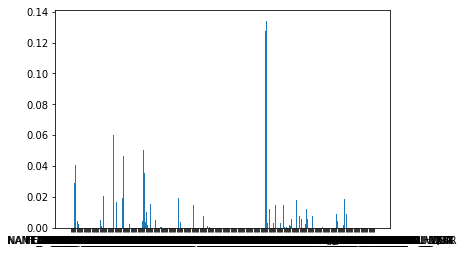

In [37]:
print(X_0_train.columns.shape)
print(X_0_fi.shape)
#X_0_fi_data = pd.DataFrame(X_0_fi, columns = [X_0_train.columns])
plt.bar(X_0_train.columns, X_0_fi)
plt.show()

In [69]:
X_0_ifarray = np.vstack([X_0_train.columns,X_0_fi])
#display(X_0_ifcheck)
X_0_ifcheck = np.sort(X_0_ifarray, axis=1)[::-1]
#display(X_0_ifcheck)
X_0_fi_data = pd.DataFrame(X_0_ifcheck)
display(X_0_fi_data)
X_0_fi_data_short = X_0_fi_data.loc[:,250:]

,0,1,2,3,4,5,6,7,8,9,...,255,256,257,258,259,260,261,262,263,264
0,0,0,0,0,0,0,0,0,0,0,...,0.0331784,0.0355174,0.0404165,0.0463955,0.0477046,0.050459,0.0601579,0.0628428,0.127708,0.13408
1,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,...,WEEKDAY_APPR_PROCESS_START_4,WEEKDAY_APPR_PROCESS_START_5,WEEKDAY_APPR_PROCESS_START_6,WEEKDAY_APPR_PROCESS_START_7,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE


In [88]:
#display(X_0_fi_data[1:2])
#X_0_fi_data_short.plot.bar()

In [ ]:
#散布図
sns.scatterplot(x='AMT_', y='', 
                hue='Species', data = df_gender_onehot_mode)
plt.show()